<a href="https://colab.research.google.com/github/adijindal30/MNIST-Digit-recognition-using-DNN/blob/main/DNN_on_MNIST_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q keras
import keras

In [2]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Dropout
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.datasets import mnist

Loading the mnist dataset


In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


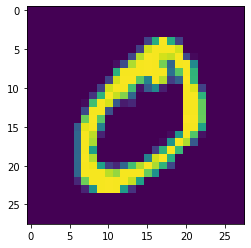

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

In [5]:
print(X_train.shape)

(60000, 28, 28)


In [6]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

Normalizing the pixel values of images


In [7]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [9]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from keras.layers import Activation
model = Sequential()

 
model.add(Convolution2D(8, (3, 3), activation='relu', input_shape=(28,28,1))) # 26
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10,( 3, 3), activation='relu')) # 24
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(8, (1, 1), activation='relu')) # 12
model.add(MaxPooling2D(pool_size=(2, 2))) # 12

model.add(Convolution2D(10, (3, 3), activation='relu')) # 10
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(12, (3, 3), activation='relu')) # 8
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(10, (1, 1), activation='relu')) # 8

model.add(Convolution2D(12, (3, 3), activation='relu')) # 6
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(Convolution2D(16, (3, 3), activation='relu')) # 4
model.add(BatchNormalization())
model.add(Dropout(0.1))


model.add(Convolution2D(10, 1, activation='relu')) #4
model.add(Convolution2D(10, 4))
model.add(Flatten())
model.add(Activation('softmax'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 26, 26, 8)         80        
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
dropout_2 (Dropout)          (None, 26, 26, 8)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 24, 24, 10)        730       
_________________________________________________________________
batch_normalization_3 (Batch (None, 24, 24, 10)        40        
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 10)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 8)        

In [14]:
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.003), 
              metrics=['accuracy'])

In [20]:
model.fit(X_train, Y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Epoch 1/100

Epoch 00001: LearningRateScheduler reducing learning rate to 0.003.
469/469 [==============================] - 3s 6ms/step - loss: 0.0558 - accuracy: 0.9821 - val_loss: 0.0323 - val_accuracy: 0.9896
Epoch 2/100

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0022744503.
469/469 [==============================] - 3s 6ms/step - loss: 0.0396 - accuracy: 0.9871 - val_loss: 0.0245 - val_accuracy: 0.9921
Epoch 3/100

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0018315018.
469/469 [==============================] - 3s 6ms/step - loss: 0.0377 - accuracy: 0.9878 - val_loss: 0.0292 - val_accuracy: 0.9902
Epoch 4/100

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0015329586.
469/469 [==============================] - 3s 6ms/step - loss: 0.0329 - accuracy: 0.9896 - val_loss: 0.0244 - val_accuracy: 0.9923
Epoch 5/100

Epoch 00005: LearningRateScheduler reducing learning rate to 0.0013181019.
469/469 [==============================] - 

In [21]:
val_accuracy = model.evaluate(X_test, Y_test, verbose=0)

In [22]:
print(val_accuracy)

[0.02128746546804905, 0.9940000176429749]
